## **Explore Data Science Job Market Using Glassdoor Data**

### May 2021

__Glassdoor__ is an American company founded in 2007. Starting as a platform where current and former employees anonymously review companies, Glassdoor is evolving into one of the most trusted websites for company research and job hunting. Glassdoor provides their own estimated salary for many jobs posted on the website, and also provides a rating for a company. 

We will focus on five types highly hiring __data science related jobs__ and scrap their job data from Glassdoor:
- Data scientist
- Data analyst
- Data engineer
- Buiness analyst
- Machine learnin engineer

In terms of objective, we are interested to investigate __correlations between salary, job satisfaction__, job positions, ratings, indutry, company size, degree adn skills needed. We hope this information can give people who are searching for data jobs some guide and help. If there is such a relation, we could build machine learning models to predict the average salary. Specifically, the questions we plan to answer are as follows:
- which career path among the five mentioned above offer a better salary, a higher rating?
- which state have higher demand for data jobs, and how the salary differs in each state?
- Which industry are offering more data jobs and have higher salary? 
- What computational skills and advanced degrees are most needed? and how they are affecting the salary?

### Project Pipeline
We will follow the typical pipeline to address any data science problem in this project report.
- [Data Collection](#Data-collection )
- [Data Cleaning and Feature Extraction](#Data-cleaning-and-feature-extraction)
- [Exploratory Data Analysis](#Exploratory-data-analysis)
- [Model Building](#Model-building)
- [Conclusions and Future Work](#Conclusions-and-future-work)

### Data collection
Data was scrapped from Glassdoor website using beatifulsoup. Total 12732 jobs were scrapped covering 5 types of data science related careers. In order to collect as many data as allowed by Glassdoor website, each career path was scrapped based on the company size filter. Detailed information were scrapped for each job, including company url link, job title, company name, location, overall rating, glassdoor estimated salary, rating highlights for compensation & benefits, culture & values, career opportunities, work/life balance, job type, company size, industry, and job description. The scrapper code is included in the [APPENDIX B: scrapper](#Appendix-B:-scapper).

### Data cleaning and feature extraction
We find that the raw data scrapped from Glassdoor contains lots of source code and non-text informaiton, so we decided to perform the preliminary data cleaning process. In addition, the skills and degree requirement in the job description are also extracted in this step. You can find the code in [APPENDIX C: preliminary data cleaning and feature extraction](#APPENDIX-C:-preliminary-data-cleaning-and-feature-extraction).

### Exploratory data analysis

In [68]:
df = pd.read_csv('/Users/rubyjiang/Desktop/15688Project/clean_final_project_data.csv')
#  Job description length 
df['desc_length'] = df['job_description'].astype(str).apply(lambda x: len(x))
#hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)
print(df.columns)
print(df.shape)

Index(['link', 'company_name', 'job_title', 'location', 'rating',
       'sub_rate_one', 'sub_rate_two', 'sub_rate_three', 'sub_rate_four',
       'job_type', 'salary_estimate', 'size', 'industry', 'job_description',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'job_state',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'bachelor', 'master',
       'phd', 'desc_length'],
      dtype='object')
(12732, 28)


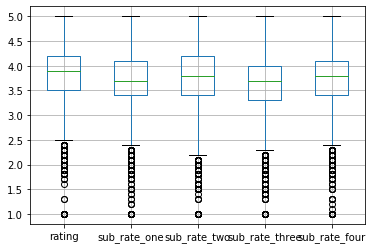

In [69]:
df.boxplot(column = ['rating', 'sub_rate_one','sub_rate_two','sub_rate_three','sub_rate_four']);

Subrate from one to four are rating highlights for compensation & benefits, culture & values, career opportunities, work/life balance, respectively.

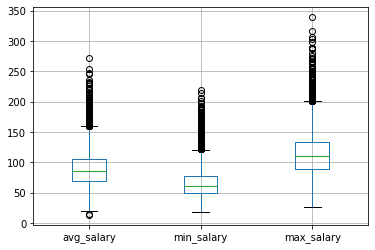

In [70]:
df.boxplot(column = ['avg_salary','min_salary','max_salary']);

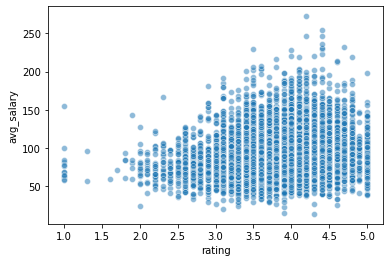

In [86]:
sns.scatterplot(data=df, x="rating", y="avg_salary", alpha = 0.5)

Generally we can find that it becomes less likely a lower rated job has a salary above 100k. Now let's simplify the title of the jobs to cofine the title to the career paths that we mentioned above.

In [7]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower() or 'data analytics' in title.lower():
        return 'data analyst'
    elif 'business' in title.lower():
        return 'business'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'product' in title.lower():
        return 'product'
    else:
        return 'na'

In [8]:
df['job_simp'] = df['job_title'].apply(title_simplifier)

In [9]:
df.job_simp.value_counts()

na                3432
data analyst      2952
data scientist    2257
business          1819
data engineer     1394
mle                878
Name: job_simp, dtype: int64

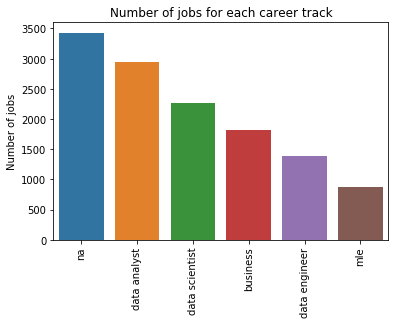

In [10]:
cat_job_simp = df.job_simp.value_counts()
chart = sns.barplot(x=cat_job_simp.index, y=cat_job_simp)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Number of jobs for each career track')
plt.ylabel("Number of jobs")
plt.show()

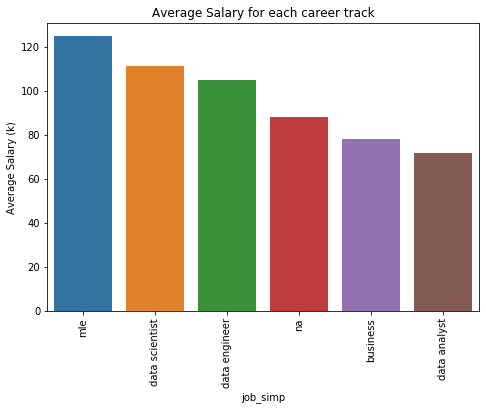

In [11]:
a = pd.pivot_table(df, index = 'job_simp', values = 'avg_salary').sort_values('avg_salary',ascending=False)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = a.values.tolist()
values = [v[0] for v in values]
#values
ax.bar(a.index,values)
chart = sns.barplot(x=a.index, y=values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Average Salary (k)")
plt.title('Average Salary for each career track')
plt.show()

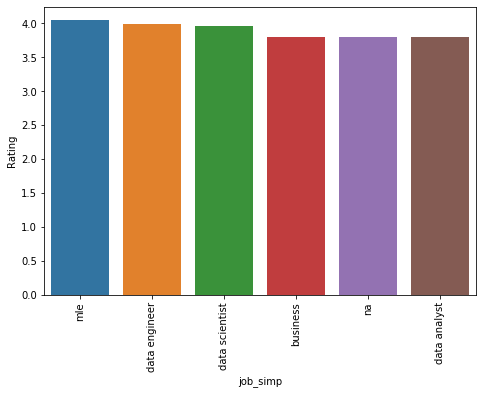

In [12]:
a = pd.pivot_table(df, index = 'job_simp', values = 'rating').sort_values('rating',ascending=False)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = a.values.tolist()
values = [v[0] for v in values]
#values
ax.bar(a.index,values)

chart = sns.barplot(x=a.index, y=values)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.ylabel("Rating")
plt.show()

The above analysis can answer the __first question__ we asked. It clearly shows that the job type __data analyst__ has the highest demaning, however, it has the lowest average salary and jos satisfication from the rating. Though the number of jobs positng on glassdoor looking for __machine learning engineer__ (MLE) is quite low, its salary package and rating is the highest among all five types of jobs. Data Scientist has both a decent amount of demaning and salary.

graph for location: total = 20
graph for job_state: total = 20
graph for company_name: total = 20


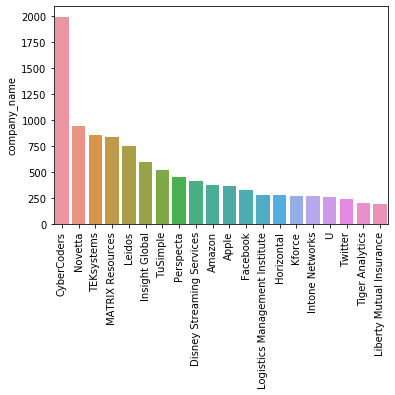

In [13]:
for i in df[['location','job_state','company_name']].columns:
    cat_num = df[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show

In [14]:
#location, job_state, company_name
cat_num = df['job_state'].value_counts()[:20]
# CA percent
print('CA', cat_num[0] / cat_num.sum())
# Remote percent
print('Remote',cat_num[2] / cat_num.sum())
# NY percent
print('NY', cat_num[1] / cat_num.sum())

CA 0.1917900403768506
Remote 0.08181119015573927
NY 0.09027110171120939


In [15]:
us_state_abbrev = {'Remote' : 'Remote',
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'New York State': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'Washington State': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'United States': 'US', 'Puerto Rico': 'PR', 'North Chesterfield': 'VA',
'Division of Instacart': 'NA', 'Division of Intuit': 'NA', 'Division of Red Ventures': 'NA', 'Division of Heal': 'NA' , 'Division of Veyo Logistics':'NA', 'Division of GardaWorld Security Services U.S.':'NA'}

In [16]:
df['job_state'] = df['job_state'].map(us_state_abbrev).fillna(df['job_state'])

In [17]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)[:5]

,avg_salary
job_state,
NA,124.473684
WA,112.477663
CA,111.887006
NY,95.552822
VA,94.658023


The above three figurs can answer the __second question__ we proposed. In the first figure, we find that in terms of the specific cities the job is located, the number of jobs that's __remote__, i.e. working from home, far exceeded the number of jobs in any other cities due to the pandemic situation. In the second figure, the number of jobs in California is the highest taking about 20% of all jobs; remove taking about 8%, which is almost the same as the portion in New York State. Besides, CA, WA and NY's salary are the top three among all states. Surprisingly, a non-FANG company called 'CyberCoders' is posting the higest number of jobs about twice the amount from a FANG company such as Amazon. It turns out CyberCoder is a permanent placement recruiting firm which explains the trend in the third figure.

graph for industry: total = 20


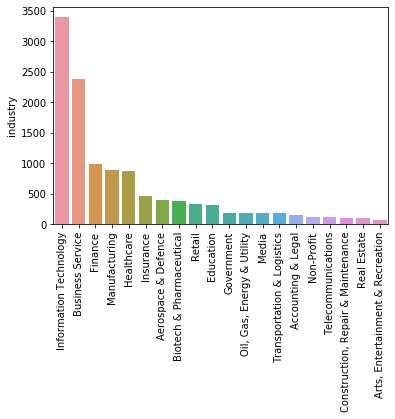

In [18]:
for i in df[['industry']].columns:
    cat_num = df[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.savefig(i, dpi=300,bbox_inches='tight')
    plt.show()

In [19]:
pd.pivot_table(df, index = ['industry'], values = 'avg_salary').sort_values('avg_salary', ascending = False)[:10]

,avg_salary
industry,
Information Technology,105.856899
Biotech & Pharmaceutical,100.619932
Media,99.665217
Aerospace & Defence,95.487768
"Arts, Entertainment & Recreation",93.714286
Consumer Service,91.047619
Finance,89.140726
Government,88.176056
Retail,87.962598


Here, we can see that for the third question, information technology has the higest demand for data jobs and also the best salary offering. 

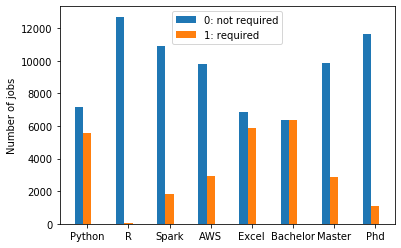

In [20]:
df_cat = df[['python_yn', 'R_yn', 'spark', 'aws', 'excel', 'bachelor', 'master','phd']]
y0 = []
y1 = []
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    #print(i, cat_num.tolist())
    y0.append(cat_num.tolist()[0])
    y1.append(cat_num.tolist()[1])
#plot
x = np.arange(8)
width = 0.2
x = np.arange(8)
width = 0.2
# plot data in grouped manner of bar type
plt.bar(x-0.2, y0, width)
plt.bar(x, y1, width)
plt.xticks(x, ['Python', 'R', 'Spark', 'AWS', 'Excel', 'Bachelor', 'Master','Phd'])
plt.ylabel("Number of jobs")
plt.legend(["0: not required", "1: required"])
plt.show()

In terms of computation skills, almost 50% of the job posting mentioned python and excel and requir a bachelor in their job description. Very small amount of jobs mention R-studio or require a phd degree. Now, let's look at how the features mentioned above correlate with job satisfication and salary.

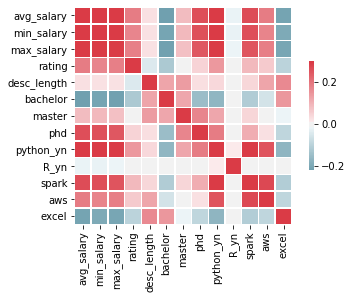

In [21]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['avg_salary','min_salary','max_salary','rating','desc_length','bachelor','master','phd','job_state',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.savefig('Correlation', dpi=300,bbox_inches='tight')

It seems that the higher the degree the jobs require, the higher the salay and work satisfication (using rating as a proxy). Besides, python, Spark, AWS are positively related to a higher salary, whereas if a job specifically mentions bachelor or R-studio or Excel, the salary of it can be lower than others that requir python and more advanced degrees. This could inform us that higher degree and more technical skills are worth to acquiring for data job hunting.

In [75]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rubyjiang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rubyjiang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

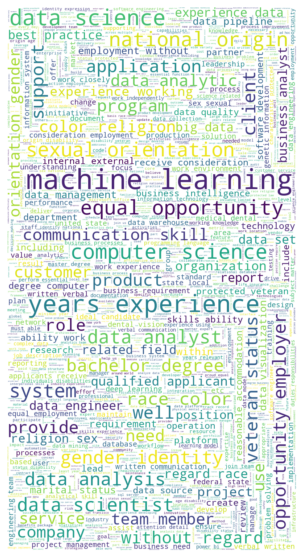

In [76]:
words = " ".join(df['job_description'].astype(str))

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()


Just our of curiosity, we used a basic NLP technique to analyze the job descriptions in our data. We can find that the phrases 'machine learning',  'years experience', 'data science' , 'computer science' are frequently used, which should reflect the trend in the data jobs market.

### Model building

The second objective of this project is to build machine learning models to estimated the average salary. Here, we are going to apply three models:
- linear regression
- random forest
- XGBoost regression

In [22]:
df = pd.read_csv('/Users/rubyjiang/Desktop/15688Project/final_project_data_after_EDA.csv')
df.shape

(12732, 30)

In [23]:
df.head(2)

,link,company_name,job_title,location,rating,sub_rate_one,sub_rate_two,sub_rate_three,sub_rate_four,job_type,...,R_yn,spark,aws,excel,bachelor,master,phd,desc_length,job_simp,seniority
0,http://www.glassdoor.sg/partner/jobListing.htm...,Array Information Technology,Data Scientist,"Fairfax, VA",4.0,4.0,4.0,3.9,4.2,Full-time,...,0,1,0,0,1,0,0,2178,data scientist,na
1,http://www.glassdoor.sg/partner/jobListing.htm...,Metromile,Staff Data Scientist,"San Francisco, CA",4.0,3.9,4.2,3.8,3.9,Full-time,...,0,1,1,1,0,0,0,6731,data scientist,na


In [24]:
df = df.dropna(subset=['salary_estimate'])
df.columns

Index(['link', 'company_name', 'job_title', 'location', 'rating',
       'sub_rate_one', 'sub_rate_two', 'sub_rate_three', 'sub_rate_four',
       'job_type', 'salary_estimate', 'size', 'industry', 'job_description',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'job_state',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'bachelor', 'master',
       'phd', 'desc_length', 'job_simp', 'seniority'],
      dtype='object')

In [25]:
# exclude the max_salary, min_salary since they are features extracted from our target 'average_salary'
df_model = df[['rating','sub_rate_one', 'sub_rate_two', 'sub_rate_three', 'sub_rate_four',
       'job_type', 'size', 'industry',
       'hourly', 'avg_salary', 'job_state',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'bachelor', 'master',
       'phd', 'desc_length', 'job_simp', 'seniority']]

In [26]:
# get dummy data 
df_dum = pd.get_dummies(df_model)
df_dum = df_dum.dropna()

In [27]:
df_dum.shape

(8530, 123)

In [28]:
# train test split 
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

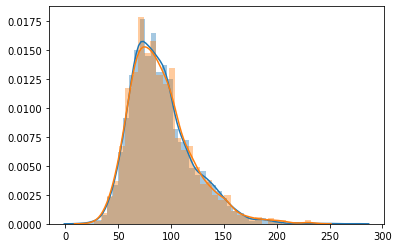

In [29]:
sns.distplot(y_train);
sns.distplot(y_test);

#### Linear regression using statsmodel 

In [43]:
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 17 May 2021   Prob (F-statistic):               0.00
Time:                        09:47:13   Log-Likelihood:                -37128.
No. Observations:                8530   AIC:                         7.449e+04
Df Residuals:                    8412   BIC:                         7.532e+04
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      38.8758      2.081     18.677      0.000      34.796      42.956
rating                                                      0.7092      1.054      0.673      0.501      -1.356       2.775
sub_rate_one                                                6.4096      0.626     10.242      0.000       5.183       7.636
sub_rate_two                                               -0.5643      0.877     -0.644      0.520      -2.283       1.154
sub_rate_three                                             -1.9681      0.812     -2.425      0.015      -3.559      -0.377
sub_rate_four                                              -0.3624      0.651     -0.557      0.578      -1.638       0.913
hourly                                                    -61.3322      5.805    -10.566      0.000     -72.711     -49.954
python_yn                                                   3.2018      0.530      6.045      0.000       2.163       4.240
R_yn                                                      -10.7814      4.274     -2.523      0.012     -19.160      -2.403
spark                                                       1.9693      0.711      2.771      0.006       0.576       3.362
aws                                                         2.1359      0.542      3.939      0.000       1.073       3.199
excel                                                      -2.2614      0.442     -5.122      0.000      -3.127      -1.396
bachelor                                                   -2.6295      0.445     -5.903      0.000      -3.503      -1.756
master                                                      0.2554      0.513      0.498      0.619      -0.750       1.261
phd                                                         5.9762      0.811      7.366      0.000       4.386       7.567
desc_length                                              5.316e-05      0.000      0.407      0.684      -0.000       0.000
job_type_Apprenticeship                                   -11.8254     11.504     -1.028      0.304     -34.375      10.724
job_type_Contract                                          15.4406      3.901      3.958      0.000       7.793      23.088
job_type_Full-time                                         14.6293      2.425      6.033      0.000       9.876      19.382
job_type_Intern/Trainee                                    -4.7079      5.589     -0.842      0.400     -15.664       6.248
job_type_Part-time                                         11.4264      2.860      3.995      0.000       5.819      17.033
job_type_Temporary                                         13.9128      4.472      3.111      0.002       5

From the result of this linear model, we can see that the model can explain about 60% of the variation in our data. From the coefficient column, we can find how much a feature is contributing to the salary in unit thousand. The results are generally in line with the findings during EDA.

#### Linear regression

In [44]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)
cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)

array([-14.04125862, -14.29337645, -14.65104455])

In [45]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-14.328559873525455

,alpha,error
6,0.007,-14.283421


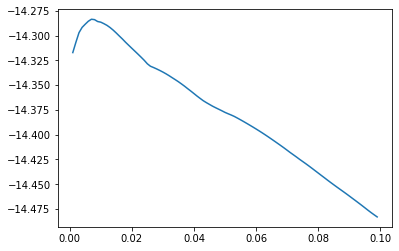

In [48]:
lm_l = Lasso() #alpha=.13
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/1000)
    lml = Lasso(alpha=(i/1000))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

#### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
#parameters = {'n_estimators':range(10,100,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
parameters = {'n_estimators':np.arange(70,110,10),
              'criterion':['mae'], 
              'max_features':['auto','sqrt','log2']}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

print(gs.best_estimator_)
print(gs.best_score_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
-13.520472056952135


#### XGBoost

In [35]:
reg_xgb = xgb.XGBRegressor(verbosity=0, 
                           objective='reg:squarederror', 
                           missing=None, 
                           seed=42)
reg_xgb.fit(X_train, 
            y_train, 
            eval_metric= 'mae',
            early_stopping_rounds=20,
            eval_set=[(X_test, y_test)])

[0]	validation_0-mae:81.1861
Will train until validation_0-mae hasn't improved in 20 rounds.
[1]	validation_0-mae:73.0958
[2]	validation_0-mae:65.8386
[3]	validation_0-mae:59.297
[4]	validation_0-mae:53.4245
[5]	validation_0-mae:48.1593
[6]	validation_0-mae:43.4319
[7]	validation_0-mae:39.2286
[8]	validation_0-mae:35.5622
[9]	validation_0-mae:32.323
[10]	validation_0-mae:29.5334
[11]	validation_0-mae:27.1725
[12]	validation_0-mae:25.1201
[13]	validation_0-mae:23.3634
[14]	validation_0-mae:21.8932
[15]	validation_0-mae:20.6731
[16]	validation_0-mae:19.6846
[17]	validation_0-mae:18.8915
[18]	validation_0-mae:18.2114
[19]	validation_0-mae:17.6479
[20]	validation_0-mae:17.1735
[21]	validation_0-mae:16.7708
[22]	validation_0-mae:16.4609
[23]	validation_0-mae:16.1873
[24]	validation_0-mae:15.9669
[25]	validation_0-mae:15.7766
[26]	validation_0-mae:15.6279
[27]	validation_0-mae:15.5065
[28]	validation_0-mae:15.3876
[29]	validation_0-mae:15.3022
[30]	validation_0-mae:15.2273
[31]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, silent=None, subsample=1, verbosity=0)

In [36]:
#https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
# "Learn" the mean from the training data
mean_train_pred = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train_pred
#baseline_predictions = np.ones(y_test.shape) * np.mean(y_train)
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 22.87


In [37]:
y_test_pred = reg_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on test: %.5f" % mae)

MAE on test: 13.99702


In [38]:
## Round 1 
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1, 10],
    'min_child_weight': [5, 6, 7, 8]
}

In [39]:
optimal_params= GridSearchCV(
    estimator = xgb.XGBRegressor(objective='reg:squarederror', 
                                 missing=None, 
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5),
    param_grid = param_grid,
    scoring = 'neg_mean_absolute_error', # https://scikit-learn.org/stable/modules/model_evaluation.html
    verbose=2, # set verbose to 0 if you are not interested in what XGBoost is doing.
    n_jobs=10,
    cv=3 # 3 fold cross validation, 10 fold   
)

optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_metric='mae',
                   eval_set=[(X_test, y_test)],
                   verbose=False)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   15.6s
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 628 tasks      | elapsed:  5.7min
[Parallel(n_jobs=10)]: Done 993 tasks      | elapsed:  9.0min
[Parallel(n_jobs=10)]: Done 1296 out of 1296 | elapsed: 11.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.5, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alph..._lambda=1,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=0.9, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'gamma': [0, 0.25, 1.0],
                         'learning_rate': [0.005, 0.01, 0.05, 0.1],
             

In [40]:
print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'reg_lambda': 0}


In [41]:
## Round 2
param_grid = {
    'max_depth': [5,8,10,15],
    'learning_rate': [0.1], #[0.1, 0.5, 1],
    'gamma': [0],
    'reg_lambda': [0],
    'min_child_weight': [1,2,3,4,5]
}
optimal_params= GridSearchCV(
    estimator = xgb.XGBRegressor(objective='reg:squarederror', 
                                 missing=None, 
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5),
    param_grid = param_grid,
    scoring = 'neg_mean_absolute_error',
    verbose=2,
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_metric='mae',
                   eval_set=[(X_test, y_test)],
                   verbose=False)
print(optimal_params.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   19.3s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:   51.1s finished


{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 2, 'reg_lambda': 0}


In [42]:
reg_xgb = xgb.XGBRegressor(seed = 42,
                           objective='reg:squarederror',
                           gamma = 0,
                           learning_rate = 0.1,
                           max_depth = 8,
                           min_child_weight = 2,
                           reg_lambda = 0,
                           subsample = 0.9,
                           colsample_bytree = 0.5)

reg_xgb.fit(X_train, 
            y_train, 
            verbose = True,
            eval_metric='mae', 
            early_stopping_rounds=10,
            eval_set=[(X_test, y_test)])

[0]	validation_0-mae:81.1683
Will train until validation_0-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:73.1008
[2]	validation_0-mae:65.8407
[3]	validation_0-mae:59.2984
[4]	validation_0-mae:53.4514
[5]	validation_0-mae:48.1934
[6]	validation_0-mae:43.4641
[7]	validation_0-mae:39.2949
[8]	validation_0-mae:35.5703
[9]	validation_0-mae:32.3195
[10]	validation_0-mae:29.5083
[11]	validation_0-mae:27.0746
[12]	validation_0-mae:24.9881
[13]	validation_0-mae:23.1826
[14]	validation_0-mae:21.6858
[15]	validation_0-mae:20.4229
[16]	validation_0-mae:19.3029
[17]	validation_0-mae:18.3955
[18]	validation_0-mae:17.6467
[19]	validation_0-mae:16.9753
[20]	validation_0-mae:16.4499
[21]	validation_0-mae:16.0121
[22]	validation_0-mae:15.6613
[23]	validation_0-mae:15.376
[24]	validation_0-mae:15.1236
[25]	validation_0-mae:14.9211
[26]	validation_0-mae:14.738
[27]	validation_0-mae:14.582
[28]	validation_0-mae:14.4738
[29]	validation_0-mae:14.3415
[30]	validation_0-mae:14.2397
[31]	validation_0-m

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=2, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             seed=42, silent=None, subsample=0.9, verbosity=1)

In [49]:
y_test_pred = reg_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on test: %.5f" % mae)

MAE on test: 13.44470


Feature importance from XGBoost model

['job_simp_data analyst', 'seniority_senior', 'job_state_ CA', 'python_yn', 'job_simp_data scientist', 'job_simp_mle', 'industry_Information Technology', 'job_simp_data engineer', 'job_state_ WA', 'phd']
[0.16158086, 0.13617994, 0.068062894, 0.050138287, 0.039399423, 0.036929302, 0.026490165, 0.0239624, 0.018094143, 0.01648887]


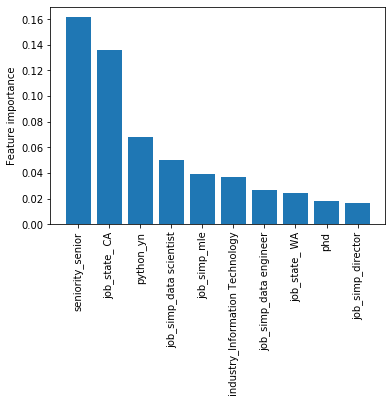

In [63]:
# the index of the sorted importacne
fig, ax = plt.subplots()
model = reg_xgb
vals = model.feature_importances_
index = sorted(range(len(vals)), reverse = True, key=vals.__getitem__)
labels = [X.columns[i+1] for i in index]
print(labels[:10])
print(sorted(model.feature_importances_, reverse= True)[:10])
# plot
plt.ylabel('Feature importance')
plt.locator_params(axis="x", nbins=20)
ax.set_xticklabels(labels, rotation = 90)
plt.bar(range(10), sorted(model.feature_importances_, reverse= True)[:10])
plt.show()

We can see that the most important features affecting the prediction of average salary that XGBoost model suggests are in good agreement with the findings in the EDA. 

#### Test Ensembles

In [64]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)
tpred_xgb = reg_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error
print('lm: %.5f'% mean_absolute_error(y_test,tpred_lm))
print('lml: %.5f'% mean_absolute_error(y_test,tpred_lml))
print('rf: %.5f'% mean_absolute_error(y_test,tpred_rf))
print('xgb: %.5f'% mean_absolute_error(y_test,tpred_xgb))

print('ensemble: %.5f'% mean_absolute_error(y_test,(tpred_xgb+tpred_rf)/2))

lm: 14.38944
lml: 16.54203
rf: 13.51932
xgb: 13.44470
ensemble: 13.26589


The best modeling among the four we tried out is XGBoost, followed by randome forest. The emsemble model that take half vote from RF and half vote from XGBoost outperforms both of them. 

### Conclusions and future work

So far we have performed comprehensive EDA and built ML models to gain insights from data job market with data scrapped from Glassdoor website in May 2021.

The EDA helps us investigate the correlations between salary, job satisfaction, job information and company information. This can help people looking for jobs make a better decision in terms of which data related career path and where they plan to work for which industry, etc. This project finds that job location, job type, coding skills and advanced degrees are essential features for a data related job with high salary and rating.

After this, supervised machine learning (ML) models are used to predict average salary of a job and to evaluate the feature importance. The feature importance from ML models are in good agreement with the EDA findins. In addition, we find that the best model to predict salary is the ensemble model that take half vote from the random forest model and half vote from the XGBoost model.

Data collection is the biggest challenge in this project because Glassdoor proves difficult to scrape, as there is no public API. Due to the limited time, we mainly scrapped data that do not need to be manually clicked to be scrappable. Some of this __tricker data__ are, for example, company overview including the year the company was founded, the type and sector and revenue of the company, former and current employee reviews, benefits that the company provides, etc. All of these data might affect the salaty estimation and the accuracy of the ML models. Therefore in the future, scrapping these tricker data can be a essential task, for example, using tools like [Selenium](https://selenium-python.readthedocs.io/installation.html).

Another aspect that we can imporve in the future is that the full job descriotion was not used, rather we only extracted key words, like 'python', 'master', from it. Therefore, we can apply __natural language process__ skills to the full job descrition and build better models.

Another limitation of this project is that we are not able to scrap any __historical data__. It will be interesting to gather more data in the future and keep the analysis going. In the future, a more evolving look of the data related job market is possible. For example, we may see how skills and degrees are required for DA/DS/DE/MLE/BA positions; another example is that we may see how salary evloves with time. These findings could be very useful to build a recommendation model for users when the system has the user's detail background information.


### Appendix A: import libraries

In [47]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
# for scraper
import re
import csv
import os
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import glob
# visulization
import matplotlib.pyplot as plt
import seaborn as sns
# ML models # Note: the ML libraries are imported with the main code for easier reading and copying
# OLS
import statsmodels.api as sm
# Linear regression
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
# randome forest
from sklearn.ensemble import RandomForestRegressor
# xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import mean_absolute_error # for model evaluation
from sklearn.metrics import mean_squared_error


### Appendix B: scapper

In [ ]:
'''
Function to request page html from given URL
'''
def page_html(requested_url):
    try:
        # define headers to be provided for request authentication
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) ' 
                        'AppleWebKit/537.11 (KHTML, like Gecko) '
                        'Chrome/23.0.1271.64 Safari/537.11',
            'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
            'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
            'Accept-Encoding': 'none',
            'Accept-Language': 'en-US,en;q=0.8',
            'Connection': 'keep-alive'}
        # make request, read request object to get page html and return it.
        request_obj = Request(url = requested_url, headers = headers)
        opened_url = urlopen(request_obj)
        page_html = opened_url.read()
        opened_url.close()
        return page_html
    except Exception as e:
        pass

In [ ]:
'''
Function to return the url links for all 30 job on one given page
'''
def get_listing_links(page_html):
    links_list=[]
    try:
        # use of dictionary to make sure that there are no duplicates
        obj_links = {}
        id_temp_dict = {}
        root = BeautifulSoup(page_html, "html.parser")
        #grab all divs with a class of result
        job_list = root.find_all("li", {"class": "react-job-listing css-wp148e eigr9kq3"})
        for job in job_list:
            link = job.find('a')
            formatted_link = "http://www.glassdoor.sg" + link['href']
            links_list.append(formatted_link)
        return links_list
    except Exception as e:
         pass

In [ ]:
'''
Function to return a dictionary of scrapped information from a single job page link 
0. url link: the link to one job
1. company_name: the compnay name of the job
2. job_title: the title of the job
3. location: the location of the job
4. rating + 4 subratings:
   Thee first rating is the overall rating shown right after the company name on Glassdoor website/.
   The rest of the 4 subratings are for Compensation & Benefits, Culture & Values, Career Opportunities, and Work/Life Balance, respectively.
5. job_type: full-time or part-time 
6. job_description: the description of the job, which is a long text
7. salary_estimate: annual salary range estimated by Glassdoor
8. size: the size of the company based on employee number
9. industry: the primary business activities the company is related
'''
def jobpage_scrape(extracted_link):
    jobpage_info = {}
    html = page_html(extracted_link)
    page_soup = BeautifulSoup(html, "html.parser")
     # 0.link
    jobpage_info['link'] = extracted_link
     # 1. company_name
    try:
        company_name = page_soup.find("div", {"class": "css-16nw49e e11nt52q1"})
        jobpage_info['company_name'] = company_name.get_text()
    except Exception as e:
        # print(e)
        jobpage_info['company_name'] = None
    # 2. job title
    try:
        job_title = page_soup.find("div", {"class": "css-17x2pwl e11nt52q6"})
        jobpage_info['job_title'] = job_title.get_text()
    except Exception as e:
        # print(e)
        jobpage_info['job_title'] = None
                                              
    # 3. location
    try:
        location = page_soup.find("div", {"class": "css-1v5elnn e11nt52q2"})
        jobpage_info['location'] = location.get_text()
    except Exception as e:
        # print(e)
        jobpage_info['location'] = None                                                                                  
    # 4. rating
    try: 
        rating = page_soup.find("span", {"class": "css-1pmc6te e11nt52q4"}).get_text()
        # get rid of the star
        rating = rating[:-1]
        jobpage_info['rating'] = rating
    except Exception as e:
        # print(e)
        jobpage_info['rating'] = None 
    # four sub_ratings
    try: 
        sub_rates = page_soup.find_all("div", {"class": "css-1ieo3ql e18tf5om7"}) 
        sub_rate_one = sub_rates[0].get_text()#[-4:-1]
        sub_rate_two = sub_rates[1].get_text()#[-4:-1]
        sub_rate_three = sub_rates[2].get_text()#[-4:-1]
        sub_rate_four = sub_rates[3].get_text()#[-4:-1]
        jobpage_info['sub_rate_one'] = sub_rate_one
        jobpage_info['sub_rate_two'] = sub_rate_two
        jobpage_info['sub_rate_three'] = sub_rate_three
        jobpage_info['sub_rate_four'] = sub_rate_four
    except Exception as e:
        # print(e)
        jobpage_info['sub_rate_one'] = None 
        jobpage_info['sub_rate_two'] = None 
        jobpage_info['sub_rate_three'] = None 
        jobpage_info['sub_rate_four'] = None
     # 5. job_type
    try: 
        job_type = page_soup.find_all("span", {"class": "css-sr4ps0 e18tf5om4"})[0].get_text()
        jobpage_info['job_type'] = job_type
    except Exception as e:
        # print(e)
        jobpage_info['job_type'] = None   
    # 6. salary_estimate
    try:                                          
        salary_estimate = page_soup.find("span", {"class": "small css-10zcshf e1v3ed7e1"})
        jobpage_info['salary_estimate'] = salary_estimate.get_text()
    except Exception as e:
        jobpage_info['salary_estimate'] = None 
    # 7. company size
    try:    
        size = page_soup.find_all("span", {"class": "css-sr4ps0 e18tf5om4"})[2]
        jobpage_info['size'] = size.get_text()
    except Exception as e:
        jobpage_info['size'] = None 
    # 8. industry  
    try:      
        industry = page_soup.find_all("span", {"class": "css-sr4ps0 e18tf5om4"})[1]
        jobpage_info['industry'] = industry.get_text()
    except Exception as e:
        jobpage_info['industry'] = None  
    # 9. job_description has to be appended at the last position o.w. the csv will be ugly
    try:                                          
        job_description = page_soup.find("div", {"class": "desc css-58vpdc ecgq1xb4"}).get_text()
        pattern = '\n' + '{2,}'
        job_description = re.sub(pattern, '\n', job_description)
        job_description = job_description.replace('\n', " ")
        jobpage_info['job_description'] = job_description
    except Exception as e:
        jobpage_info['job_description'] = None 
    return jobpage_info # this is a dictionary

In [ ]:
'''
Function to write a list of dictionaries of scrapped information onto a csv file
input: 'jobs' is from function compose_all_jobpage(all_job_pages)
'''
def write_to_file(jobs, filename):
    with open(filename+'.csv', 'w', newline='', encoding="utf-8") as output_file:
        try:
            fc = csv.DictWriter(output_file, fieldnames=jobs[0].keys())
            fc.writeheader()
            fc.writerows(jobs)
        except Exception as e:
            # print(e)
            pass

In [ ]:
'''
Function to return one merged dictionary of scrapped information from multiple job page links
for each of the 30 pages, only need to run this function, and then write to csv
'''
def get_30_jobpage(base_url):
    html = page_html(base_url)
    links = get_listing_links(html)
    jobs = []
    for link in links:
        jobpage_info = jobpage_scrape(link)
        jobs.append(jobpage_info)
        print('1/900 is done')
    return jobs # a list of dictionarys

In [ ]:
# Find all 30 pages when one search for 'data scientist'
base_url = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14.htm?employerSizes=1'
all_base_urls = []
# The first 7 urls are different for each career and company size filter so that you need to copy them manully
IP2 = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14_IP2.htm?includeNoSalaryJobs=true&employerSizes=1&pgc=AB4AAYEAHgAAAAAAAAAAAAAAAaOU2gUASwEBAQcaVcPWETXFT1s6EDTL%2FUde%2FDKksAK2UqXtWqj3FAEFWWz6%2FVQ6Yp2UPFxxB9kd7c3vuN5iiUPd67clQcWVXA1bpfvc8ZCi8wAA'
IP3 = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14_IP3.htm?includeNoSalaryJobs=true&employerSizes=1&pgc=AB4AAoEAPAAAAAAAAAAAAAAAAaOU2gUAegEBARAdwaw0znstkqoTSNNow%2FfKj9829QAZLNQ3lYPOCKOeBOqngfoIm5WyvSwVSmZfKzP4sag2eG%2FmwZP%2Bi8O9ncVVB55lEYuhrfaolHcgI7LmjH9EiX8iXvf6nrgIjaaSjMUXOd%2Fv7pBez5UYABKJeJdky3MxSihsAAA%3D'
IP4 = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14_IP4.htm?includeNoSalaryJobs=true&employerSizes=1&pgc=AB4AA4EAWgAAAAAAAAAAAAAAAaOU2gUAogECARAiChDfCWXJHtU3LXS%2Fkhti7xEWHJrBDQdmX2GXE757zhp7qnkqRi5EbhYz%2BBz2CxySwT743ophkZENRB7H%2FXSa2bHMo1J3DbwCe7fv4Ykd3EjGen49dT%2BbFAlfKHscuX6Cjpy%2BLlFiSkwzojX5CRIvuRFmtVpy8hFKL7o5ZC1KVOpO2u5nPmK6frwyoGpb9tG3xt6FTg%2FOW9WdW%2B4oLgAA'
IP5 = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14_IP5.htm?includeNoSalaryJobs=true&employerSizes=1&pgc=AB4ABIEAeAAAAAAAAAAAAAAAAaOU2gUAygECASJGCRCwlMSrqb17cCFzpQihHXPkc3ov9uYY96D1yOiLAQpFHfGHfhzjuOKyD7P4ZHZdF2BtwIp2MnTKfTcciToJzMGVzZiQfnwuwv5tqm1DKSCX5pcgbmDf9HbO3owVrfARKyJCsK9rG508IwQm4sCQcDl7lPBX%2FNL%2BiwaEuRe%2B58k8p8YUXG3KB0OpW0lVKgP1Xa4kUSYrg9y9XAulb1qKOLwITaFqweNfuRhnR76twyynJtVAPB7O9XVgmgCURIDWDezR%2FKUAAA%3D%3D'
IP6 = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14_IP6.htm?includeNoSalaryJobs=true&employerSizes=1&pgc=AB4ABYEAlgAAAAAAAAAAAAAAAaOU2gUA8QECASJGCVmNJfFMlpb%2FdXcSnnSfHxan8jfSDVtFHPrZ%2FZvtES0LSnsv6rL5CIRTIsjtvIKP%2FC6mZ61IqwauZtq1W1kbDAIpvulq8UaW9VITHbIO5wcpY7X1zXIIuirYpvM7hlItcA9%2FGXQF3VDIvUxTsn3O4Z%2F7fRY3ucd%2B2lxIbhP2YLNdl5PMJQAvO7usaRNcuFngsvS1Z8GGz2s02iWSy598m4%2BB6QHci%2BaZldV7Aeom5EfoKFw3kBEyGb7ZWRttK%2FmM27rjj0NsU8BJ8XJhR9HbcXS6kh%2BF7cbBZX%2FFo%2Bwn1DwnyYJtUJnIDusuPCsAAA%3D%3D'
IP7 = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14_IP7.htm?includeNoSalaryJobs=true&employerSizes=1'

all_base_urls.append(base_url)
all_base_urls.append(IP2)
all_base_urls.append(IP3)
all_base_urls.append(IP4)
all_base_urls.append(IP5)
all_base_urls.append(IP6)
all_base_urls.append(IP7)
##########auto generate the rest
# everything after IP7 is the same as 7 except the number
for i in range(8,31):
    IP = 'https://www.glassdoor.com/Job/data-scientist-jobs-SRCH_KO0,14_IP' + str(i)+'.htm?includeNoSalaryJobs=true&employerSizes=1'
    all_base_urls.append(IP)

In [ ]:
# For exmaple, here is to show you how to collect 30 jobs from one page/link in the all_base_urls list:
# seperate 30 pages to stablize the data collection process
result01 = get_30_jobpage(all_base_urls[0])
# After all 30 page results are collected, save to a csv file
n='1'
results = result01 + result02 + result03 + result04 + result05 + result06 + result07 + result08 + result09 + result10 + result11 + result12 + result13 + result14 + result15 + result16 + result17 + result18 + result19 + result20 +  result21 + result22 + result23 + result24 + result25 + result26 + result27 + result28 + result29 + result30
write_to_file(results, 'data_scientist_employerSizes='+ n)

### APPENDIX C: preliminary data cleaning and feature extraction

Afrer collecting all data for the 5 careers, we have a lot of csv file save in a folder. Now, we will concat them into one csv file, and remove the not necessary and non-text which is the source code scrapped from Glassdoor.

In [ ]:
#concat
path = '/Users/rubyjiang/Desktop/15688Project/raw_data_employerSize'
all_files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in all_files))

In [ ]:
df = df.fillna("")
df['company_name'] =  df['company_name'].str.extract('([a-zA-Z ]+)([^a-zA-Z ]+)', expand=True)[0]
df['sub_rate_one'] = df['sub_rate_one'].astype(str).apply(lambda x: x.split('\xa0')[-1]).astype(str).str[0:3]
df['sub_rate_two'] = df['sub_rate_two'].astype(str).apply(lambda x: x.split('\xa0')[-1]).astype(str).str[0:3]
df['sub_rate_three'] = df['sub_rate_three'].astype(str).apply(lambda x: x.split('\xa0')[-1]).astype(str).str[0:3]
df['sub_rate_four'] = df['sub_rate_four'].astype(str).apply(lambda x: x.split('\xa0')[-1]).astype(str).str[0:3]
df['salary_estimate'] = df['salary_estimate'].astype(str).apply(lambda x: x.split('(')[0])
df.to_csv("final_project_data.csv")

In [ ]:
path = '/Users/rubyjiang/Desktop/15688Project/final_project_data.csv'
df = pd.read_csv(path)
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
df = df.drop_duplicates(subset='job_description', keep="first")
len(df)

In [ ]:
df.head(1)

We can see that the salary_estimate is a range, so we will extract the lower limit and upper limit as min_salary and max_salary, respectively. We will also extract the job state from location. The required or preferred skills including python, R, Spark, excel, and degrees including bachelor, master, and phd are extracted from job_description.

In [ ]:
#salary parsing 
salary = df['salary_estimate'].astype(str).apply(lambda x: x.replace('K','').replace('$','').replace('£', ''))
df['hourly'] = df['salary_estimate'].astype(str).apply(lambda x: 1 if 'per hour' in x.lower() else 0)
min_hr = salary.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))
df['min_salary'] = min_hr.apply(lambda x: x.split('-')[0]).astype(float)
df['max_salary'] = min_hr.apply(lambda x: x.split('-')[-1]).astype(float)
df['avg_salary'] = (df.min_salary+df.max_salary)/2
#state field 
df['job_state'] = df['location'].astype(str).apply(lambda x: x.split(',')[-1])

In [ ]:
#python
df['python_yn'] = df['job_description'].astype(str).apply(lambda x: 1 if 'python' in x.lower() else 0)
#r studio 
df['R_yn'] = df['job_description'].astype(str).apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' or ' r ' in x.lower() else 0)
df.R_yn.value_counts()
#spark 
df['spark'] = df['job_description'].astype(str).apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark.value_counts()
#aws 
df['aws'] = df['job_description'].astype(str).apply(lambda x: 1 if 'aws' in x.lower() else 0)
df.aws.value_counts()
#excel
df['excel'] = df['job_description'].astype(str).apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel.value_counts()
#bachelor
df['bachelor'] = df['job_description'].astype(str).apply(lambda x: 1 if 'bachelor' in x.lower() else 0)
df.excel.value_counts()
#master
df['master'] = df['job_description'].astype(str).apply(lambda x: 1 if 'master' in x.lower() else 0)
df.excel.value_counts()
#phd
df['phd'] = df['job_description'].astype(str).apply(lambda x: 1 if 'phd' in x.lower() else 0)
#df.phd.value_counts()

The next step is exploratory data analysis, please go to the main content.

Count the number of words in this notebook

In [87]:
#https://github.com/datamics/jupyter-word-count/blob/master/count-jupyter-nb-words.py
import io
import os
from nbformat import current

total_markdown = 0
total_heading = 0
total_code = 0

for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".ipynb") and not file.endswith("checkpoint.ipynb") :
            #print(os.path.join(root, file))
            with io.open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                nb = current.read(f, 'json')

            word_count_markdown = 0
            word_count_heading = 0
            word_count_code = 0
            for cell in nb.worksheets[0].cells:
                if cell.cell_type == "markdown":
                    word_count_markdown += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "heading":
                    word_count_heading += len(cell['source'].replace('#', '').lstrip().split(' '))
                elif cell.cell_type == "code":
                    word_count_code += len(cell['input'].replace('#', '').lstrip().split(' '))
            total_markdown += word_count_markdown
            total_heading += word_count_heading
            total_code += word_count_code

print("{} Words in notebooks' markdown" .format(total_markdown))
print("{} Words in notebooks' heading" .format(total_heading))
print("{} Words in notebooks' code" .format(total_code))


1595 Words in notebooks' markdown
154 Words in notebooks' heading
22092 Words in notebooks' code
